In [1]:
import matplotlib.pyplot as plt
import json
from pennylane import numpy as np

FILES_NAMES = {"simplified_2_design":{"fd":["simplified2design_3layers_fd","simplified2design_4layers_fd"]},
               "single_double":{"fd":["meta_simples_doubles_fd"]},
               "kupccgsd":{"fd":["kupccgsd_1layers_fd", "kupccgsd_2layers_fd"]}}

DATA = {i:{"fd":[],"ps":[]} for i in FILES_NAMES}

with open('exp_runs/h2_fci.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    fci_h2 = json.loads(data)   

GRAD_METHOD_COMP = "fd" ## "fd" or "ps"

DICT_GRAD_METHOD = {"fd":"Finite Diff", "ps":"Parameter Shift"}


test_points=fci_h2["points"]
fci_energies = fci_h2["energies"]
    

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [3]:
for ansatz in FILES_NAMES:
    for diff_method in FILES_NAMES[ansatz]:
        for file in FILES_NAMES[ansatz][diff_method]:

            with open(f'exp_runs/{file}.json', 'r') as reader:
                # Read & print the entire file
                data = reader.read()
                DATA[ansatz][diff_method].append(json.loads(data))


<function matplotlib.pyplot.show(close=None, block=None)>

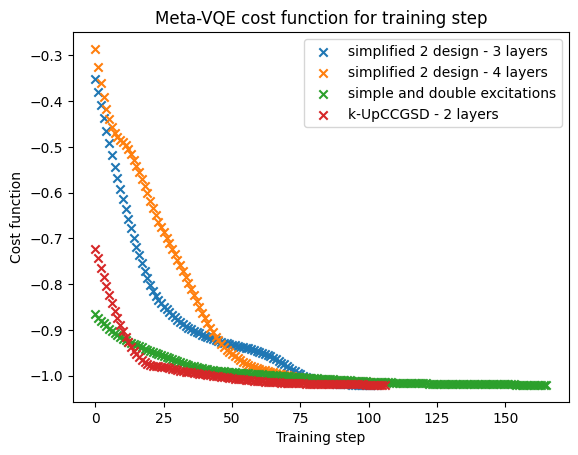

In [4]:
# Plot for meta energies
plt.scatter([i for i in range(len(DATA["simplified_2_design"]["fd"][0]["results"]["adam"]["energies"][-1]))],DATA["simplified_2_design"]["fd"][0]["results"]["adam"]["energies"][-1], label="simplified 2 design - 3 layers", marker='x')
plt.scatter([i for i in range(len(DATA["simplified_2_design"]["fd"][1]["results"]["adam"]["energies"][-1]))],DATA["simplified_2_design"]["fd"][1]["results"]["adam"]["energies"][-1], label="simplified 2 design - 4 layers", marker='x')
plt.scatter([i for i in range(len(DATA["single_double"]["fd"][0]["results"]["adam"]["energies"][-1]))],DATA["single_double"]["fd"][0]["results"]["adam"]["energies"][-1], label="simple and double excitations", marker='x')
plt.scatter([i for i in range(len(DATA["kupccgsd"]["fd"][0]["results"]["adam"]["energies"][-1]))],DATA["kupccgsd"]["fd"][0]["results"]["adam"]["energies"][-1], label="k-UpCCGSD - 2 layers", marker='x')

plt.legend()
plt.title('Meta-VQE cost function for training step')
plt.ylabel('Cost function')
plt.xlabel('Training step')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

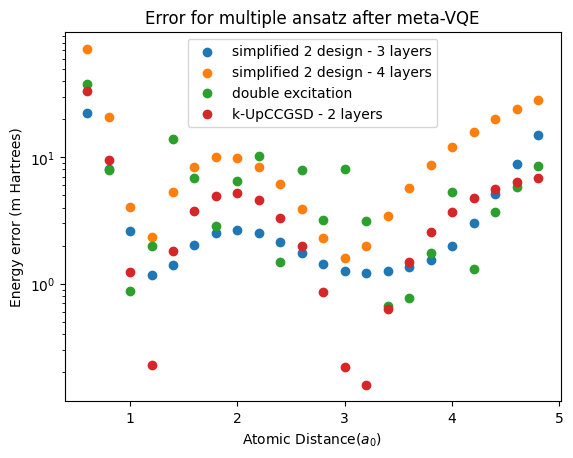

In [5]:
# Plot for errors
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["simplified_2_design"]["fd"][0]["meta"]["adam"]["energies"] ,fci_energies)], label="simplified 2 design - 3 layers", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["simplified_2_design"]["fd"][1]["meta"]["adam"]["energies"] ,fci_energies)], label="simplified 2 design - 4 layers", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["single_double"]["fd"][0]["meta"]["adam"]["energies"],fci_energies)], label="double excitation", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["kupccgsd"]["fd"][0]["meta"]["adam"]["energies"] ,fci_energies)], label="k-UpCCGSD - 2 layers", marker='o')

plt.legend()
plt.title('Error for multiple ansatz after meta-VQE')
plt.yscale('log',base=10) 
plt.ylabel('Energy error (m Hartrees)')
plt.xlabel('Atomic Distance($a_{0}$)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

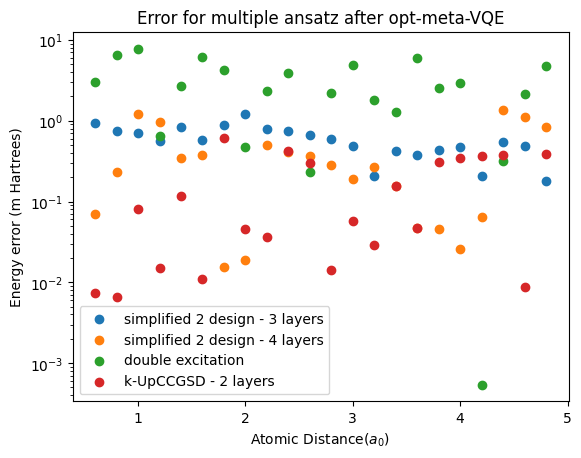

In [6]:
# Plot for errors
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["simplified_2_design"]["fd"][0]["opt_meta"] ,fci_energies)], label="simplified 2 design - 3 layers", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["simplified_2_design"]["fd"][1]["opt_meta"] ,fci_energies)], label="simplified 2 design - 4 layers", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["single_double"]["fd"][0]["opt_meta"] ,fci_energies)], label="double excitation", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(DATA["kupccgsd"]["fd"][0]["opt_meta"] ,fci_energies)], label="k-UpCCGSD - 2 layers", marker='o')

plt.legend()
plt.title('Error for multiple ansatz after opt-meta-VQE')
plt.yscale('log',base=10) 
plt.ylabel('Energy error (m Hartrees)')
plt.xlabel('Atomic Distance($a_{0}$)')
plt.show

[]

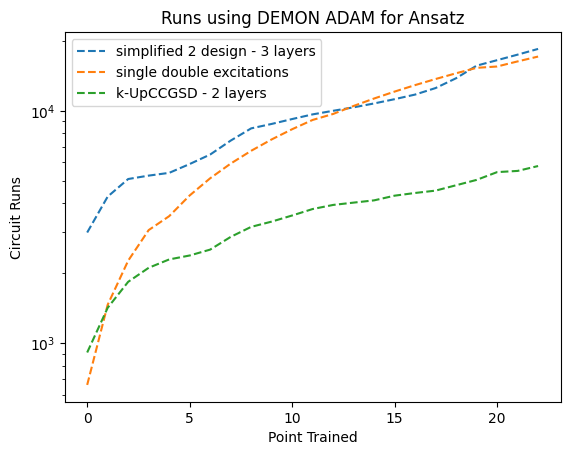

In [7]:
# Ploting number of runs
# 29,4,13


s2d_runs_fd = [i for i in DATA["simplified_2_design"]["fd"][1]["results"]["adam"]["runs_per_step"]]
single_double_runs_fd = [ i for i in DATA["single_double"]["fd"][0]["results"]["adam"]["runs_per_step"]]
kUpCCGSD_2k_runs_fd = [ i for i in DATA["kupccgsd"]["fd"][1]["results"]["adam"]["runs_per_step"]]

s2d_runs_fd.extend(DATA["simplified_2_design"]["fd"][1]["meta"]["adam"]["opt_meta_runs_per_step"])
single_double_runs_fd.extend(DATA["single_double"]["fd"][0]["meta"]["adam"]["opt_meta_runs_per_step"])
kUpCCGSD_2k_runs_fd.extend(DATA["kupccgsd"]["fd"][1]["meta"]["adam"]["opt_meta_runs_per_step"])

plt.plot([i for i in range(len(s2d_runs_fd))], np.cumsum(s2d_runs_fd)*29, linestyle="--", color=colors[0],label="simplified 2 design - 3 layers")
plt.plot([i for i in range(len(single_double_runs_fd))], np.cumsum(single_double_runs_fd)*4, linestyle="--", color=colors[1],label="single double excitations" )
plt.plot([i for i in range(len(kUpCCGSD_2k_runs_fd))], np.cumsum(kUpCCGSD_2k_runs_fd)*13, linestyle="--", color=colors[2], label="k-UpCCGSD - 2 layers")

plt.legend()
plt.yscale('log')
plt.title('Runs using DEMON ADAM for Ansatz')
plt.xlabel('Point Trained')
plt.ylabel('Circuit Runs')

plt.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

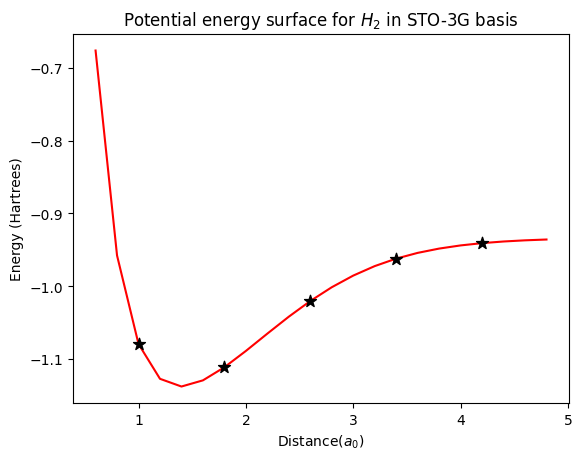

In [8]:
# Meta VQE description plot
train_points_indexes = [2,6,10,14,18]

plt.plot(test_points,fci_energies, color="r")
plt.scatter([test_points[i] for i in train_points_indexes], [fci_energies[i] for i in train_points_indexes], zorder=99, label="Train Points", marker='*', color="black", s=80)

plt.title('Potential energy surface for $H_{2}$ in STO-3G basis')
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Distance($a_{0}$)')
plt.show